In [1]:
import warnings
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


from tools import analytics

In [2]:
BATCH_SIZE = 1 
SET_TYPE = "train"
CFG_PATH = "core/configs/task23/retina_P1.py"

cfg = analytics.get_config(CFG_PATH)
metadata = analytics.load_annotation_file(cfg, SET_TYPE)

annotations = analytics.process_annotations(metadata["annotations"])
catagories = analytics.process_categories(metadata["categories"])

In [3]:
# Replace category_id with category_name from catagories
annotations["category_id"] = annotations["category_id"].map(catagories.set_index("id")["name"])

clean_annotations = analytics.remove_outliers(annotations)

In [4]:
annotations.drop(columns=["id", "image_id", "category_id"]).describe().round(3)

,area,xmin,ymin,xmax,ymax,width,height
count,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000
mean,682.515,411.209,72.322,431.375,98.958,19.565,26.512
std,1164.599,295.329,10.378,296.308,19.031,22.310,15.365
min,19.418,0.000,42.530,9.194,65.076,2.410,6.154
25%,121.077,118.700,66.045,143.230,84.070,6.930,13.910
50%,261.116,457.570,72.060,475.260,94.030,12.710,22.310
75%,675.330,556.535,77.990,577.260,116.385,22.030,36.285
max,7334.665,1006.800,102.710,1024.000,128.000,136.518,78.073


In [5]:
clean_annotations.drop(columns=["id", "image_id", "category_id"]).describe().round(3)

,area,xmin,ymin,xmax,ymax,width,height
count,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000,18287.000
mean,682.515,411.209,72.322,431.375,98.958,19.565,26.512
std,1164.599,295.329,10.378,296.308,19.031,22.310,15.365
min,19.418,0.000,42.530,9.194,65.076,2.410,6.154
25%,121.077,118.700,66.045,143.230,84.070,6.930,13.910
50%,261.116,457.570,72.060,475.260,94.030,12.710,22.310
75%,675.330,556.535,77.990,577.260,116.385,22.030,36.285
max,7334.665,1006.800,102.710,1024.000,128.000,136.518,78.073


In [6]:
unique_catagories = annotations["category_id"].unique().tolist()

### Statistics of Average Bounding Boxes 

In [7]:
# agressive_range = [0.1, 0.9]
analytics.get_avg_box_metrics(clean_annotations, unique_catagories=unique_catagories)

,type,car,person,scooter,bicycle,rider,bus,truck
0,area,731.94,191.12,278.52,282.77,242.35,1067.2,1842.69
1,aspect,14:13,7:26,9:29,13:20,2:7,33:31,41:44
2,width,28.13,7.15,9.4,13.7,8.45,33.89,41.53
3,height,26.02,26.73,29.63,20.64,28.68,31.49,44.37


##  

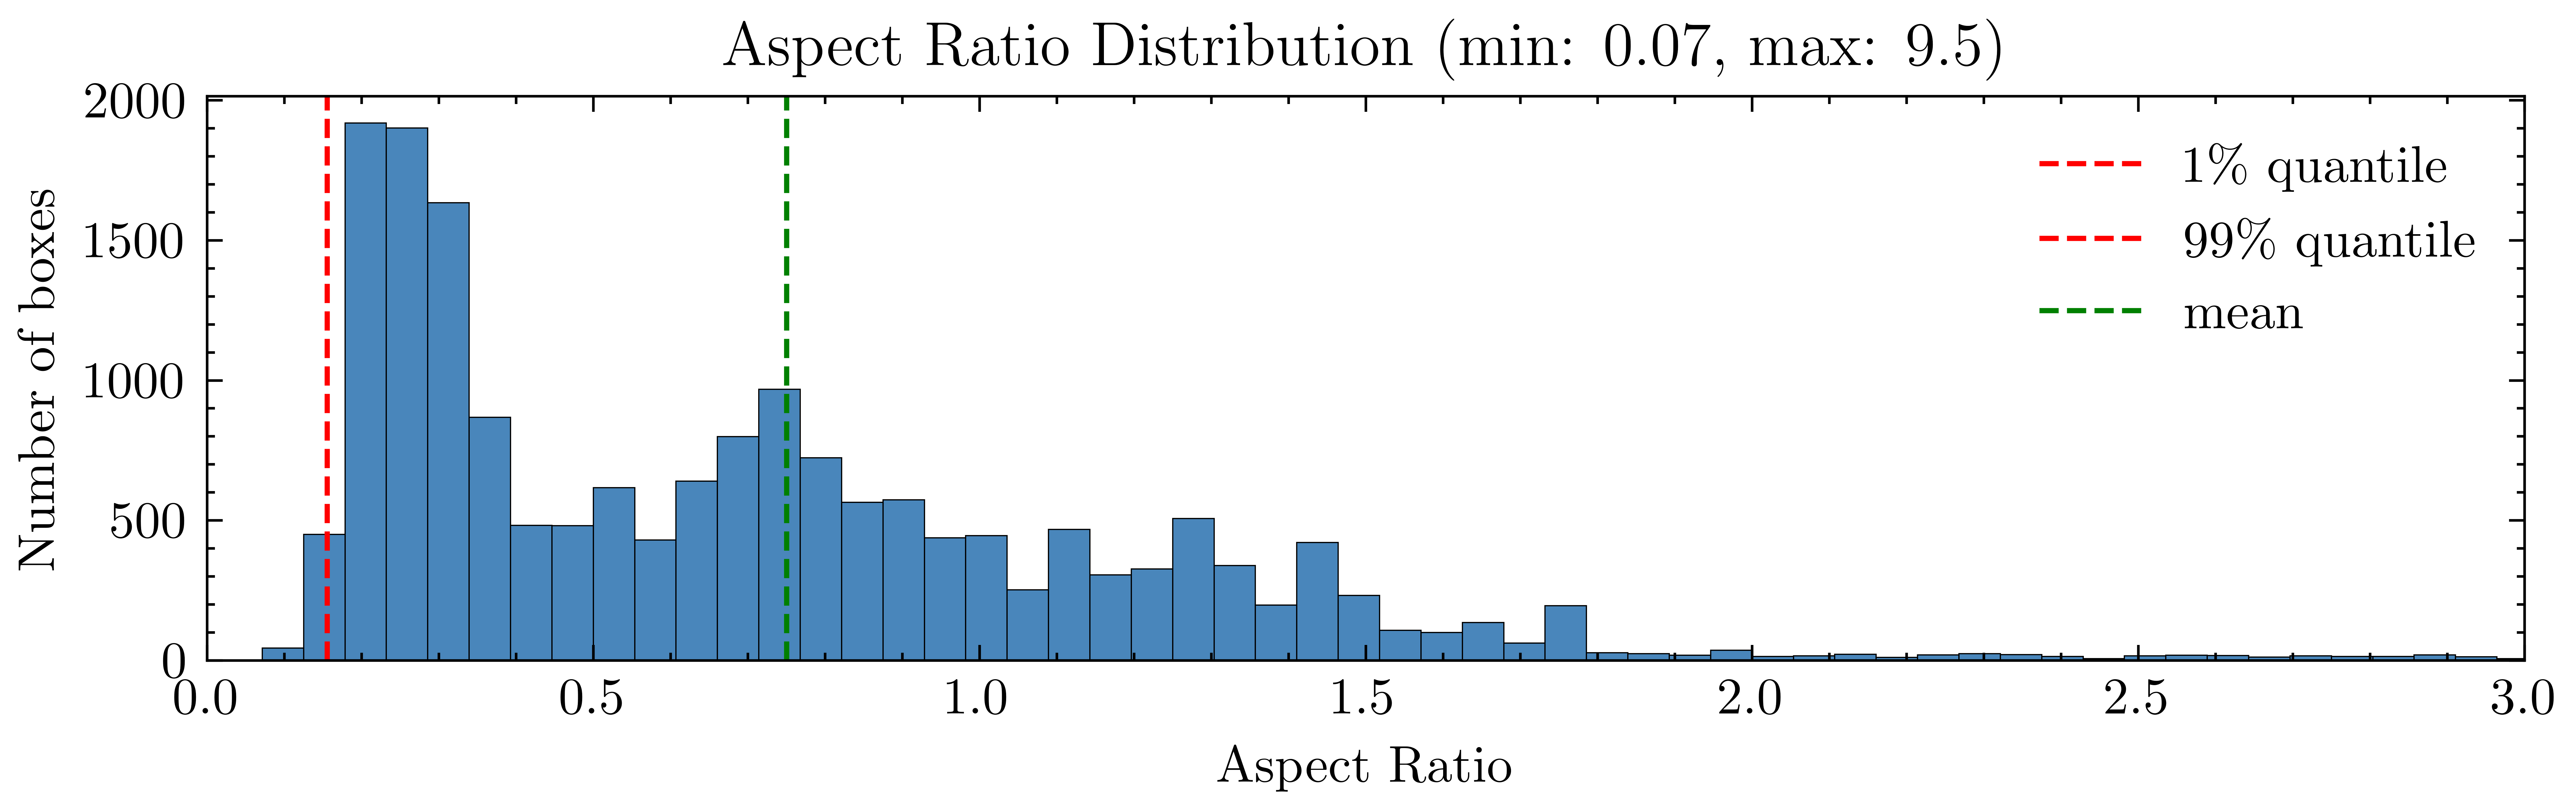

In [8]:
analytics.view_aspect_ratio_distribution(annotations, xscale=(0, 3))

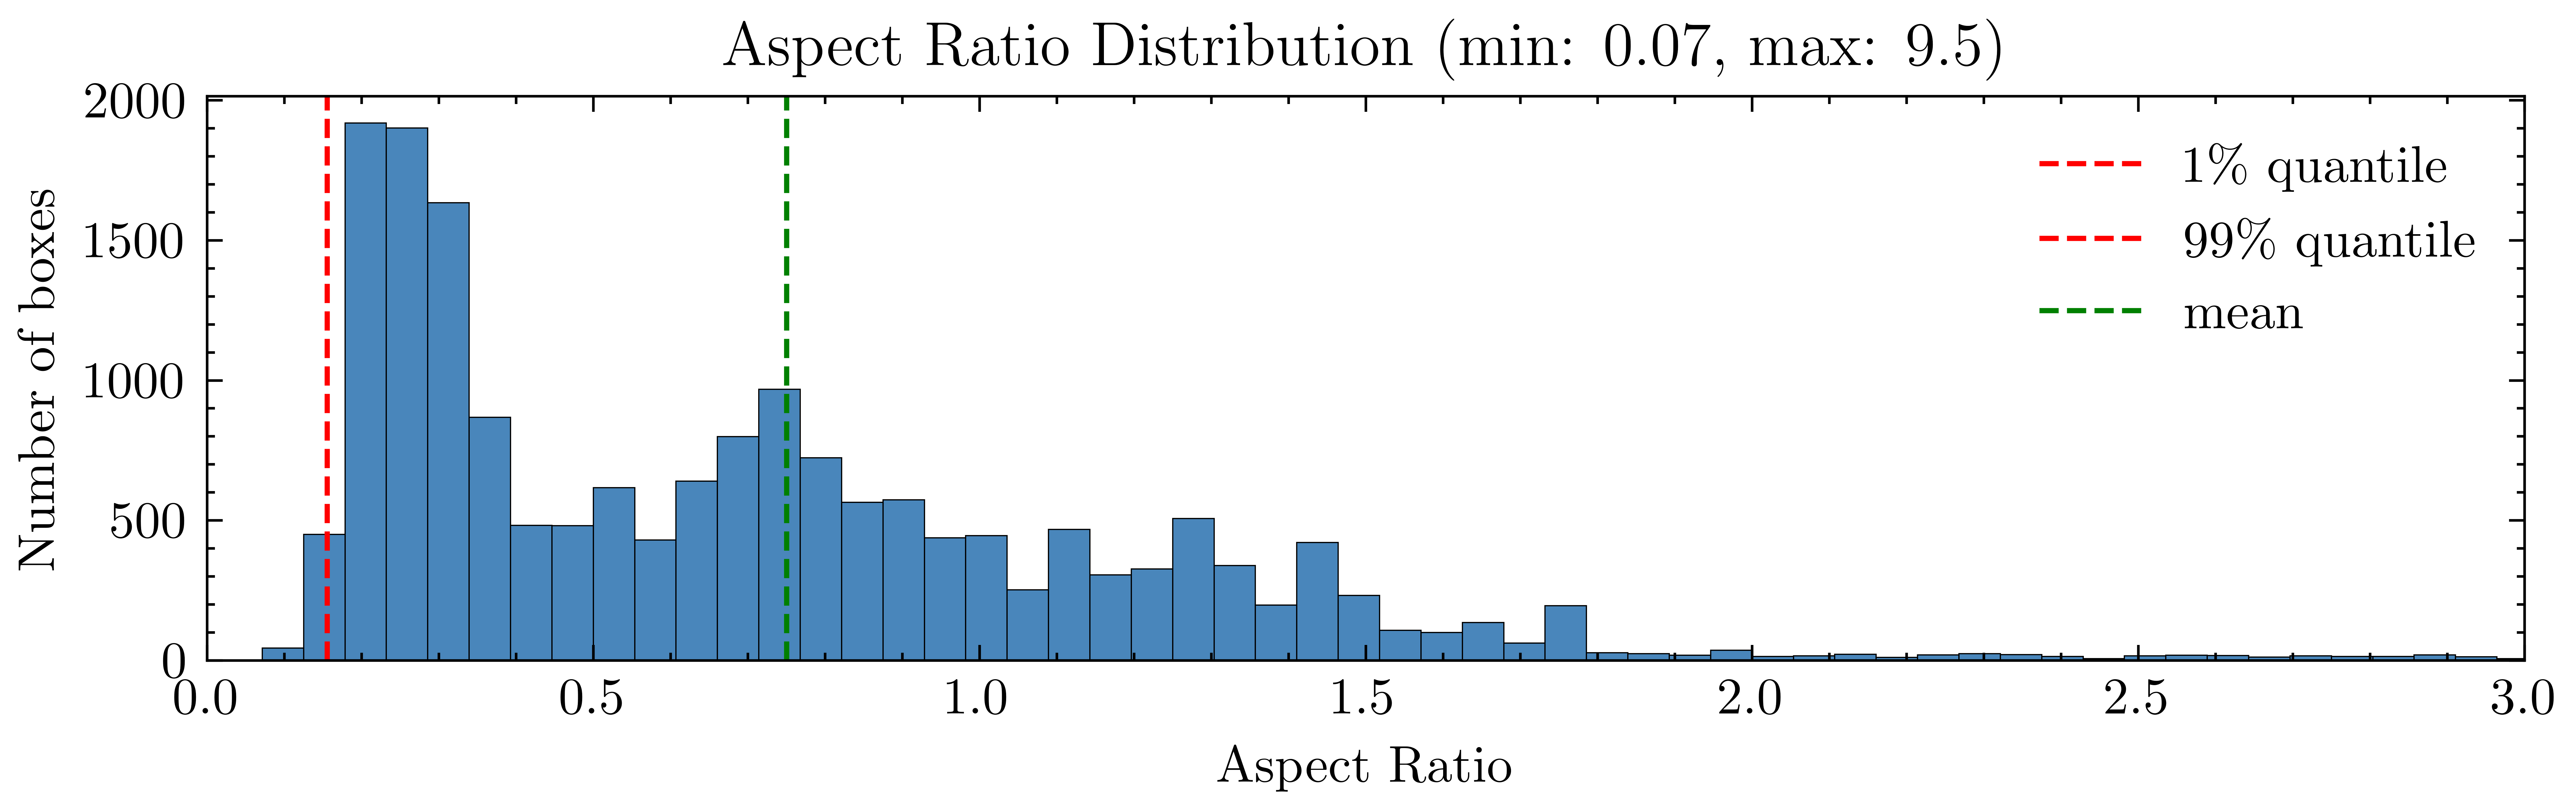

In [9]:
analytics.view_aspect_ratio_distribution(clean_annotations, xscale=(0, 3))

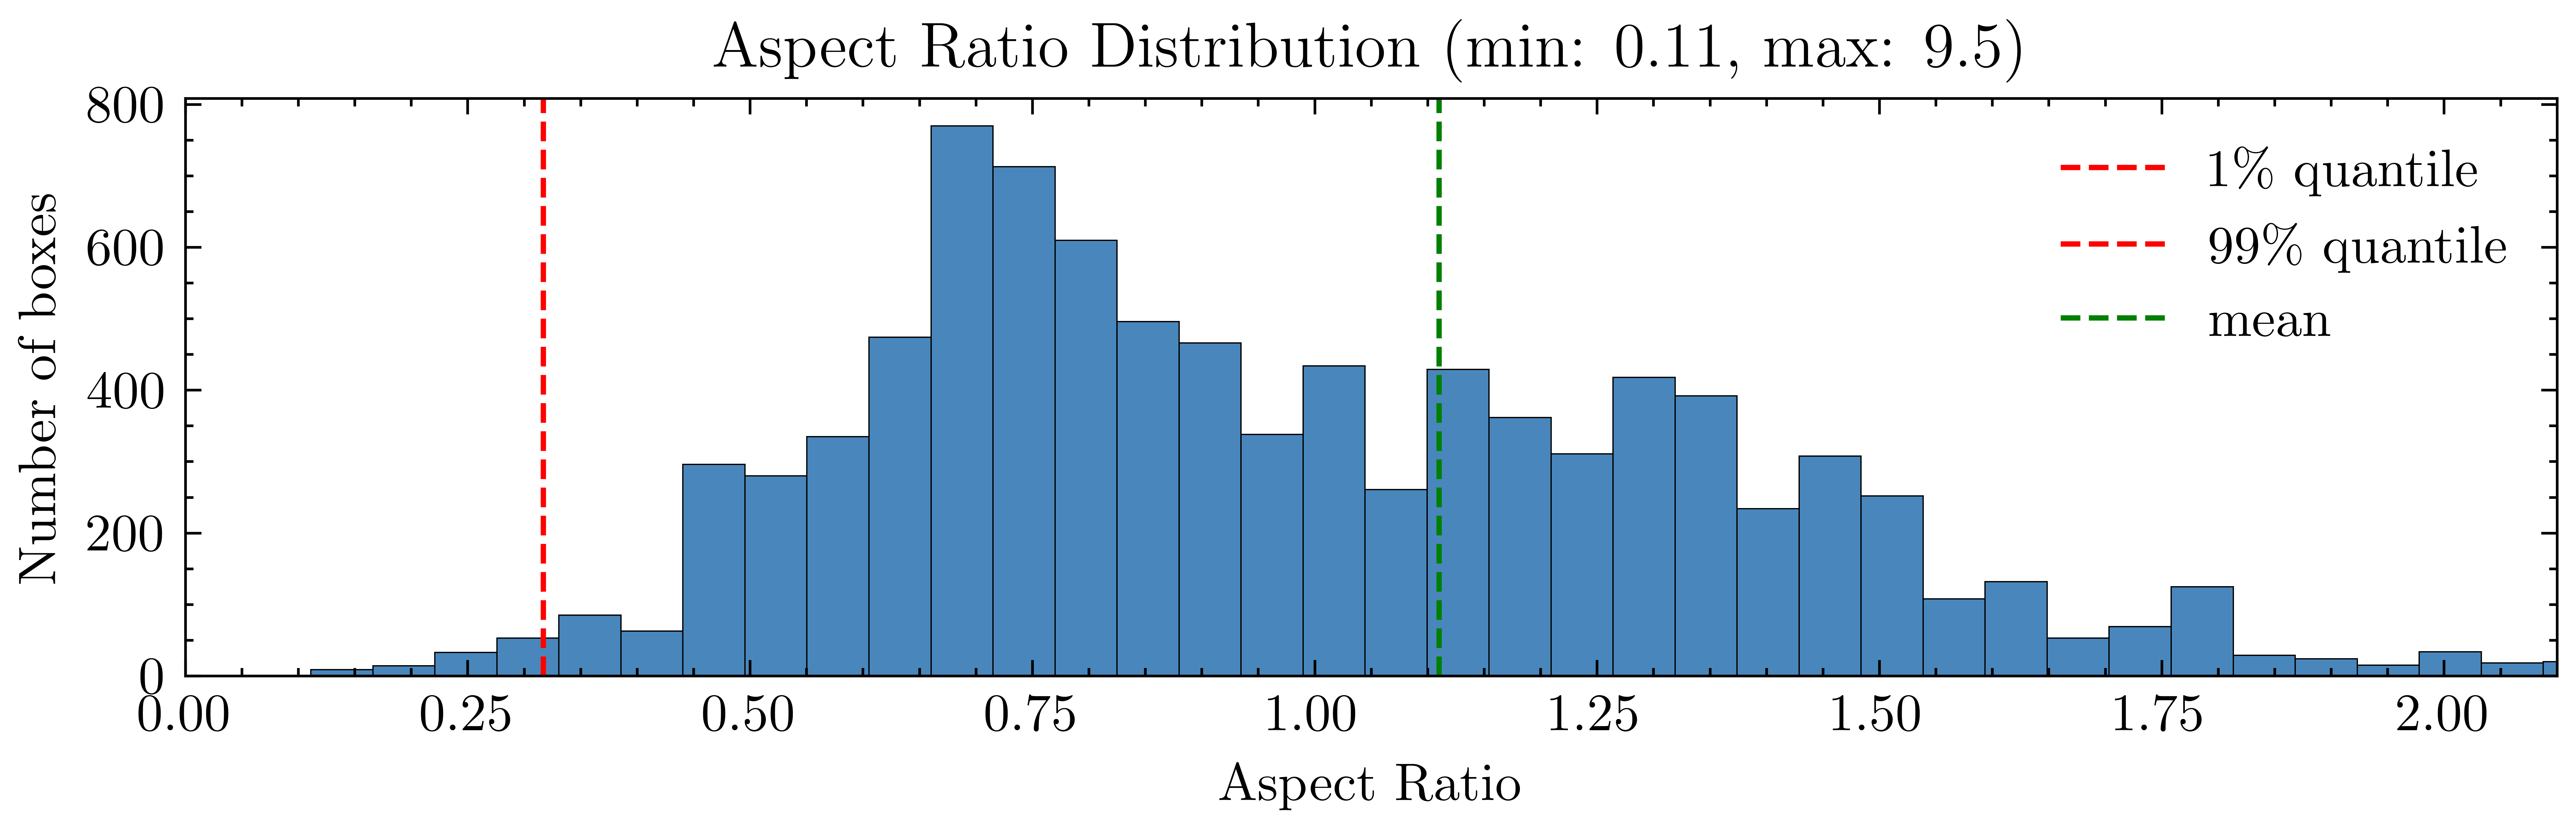

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,9563.000,9563.000,9563.000,9563.000,9563.000,9563.000,9563.000,9563.000,9563.000
mean,10233.926,818.122,964.121,369.577,73.461,398.082,99.596,28.130,26.021
std,4465.594,353.299,1314.812,294.442,9.687,296.974,20.224,25.152,15.332
min,183.860,21.000,19.418,0.000,42.530,9.194,65.076,2.700,6.154
25%,6693.500,542.000,189.858,48.715,67.225,74.245,83.010,13.365,13.060
50%,10802.000,821.000,411.817,442.300,72.750,472.170,93.600,19.670,21.760
75%,13785.000,1063.000,1281.372,511.505,78.320,537.300,126.655,32.870,37.290
max,18104.140,1572.000,7334.665,1006.800,102.710,1024.000,128.000,136.518,78.073


In [10]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "car"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2.1))
tmp_anno.describe().round(3)

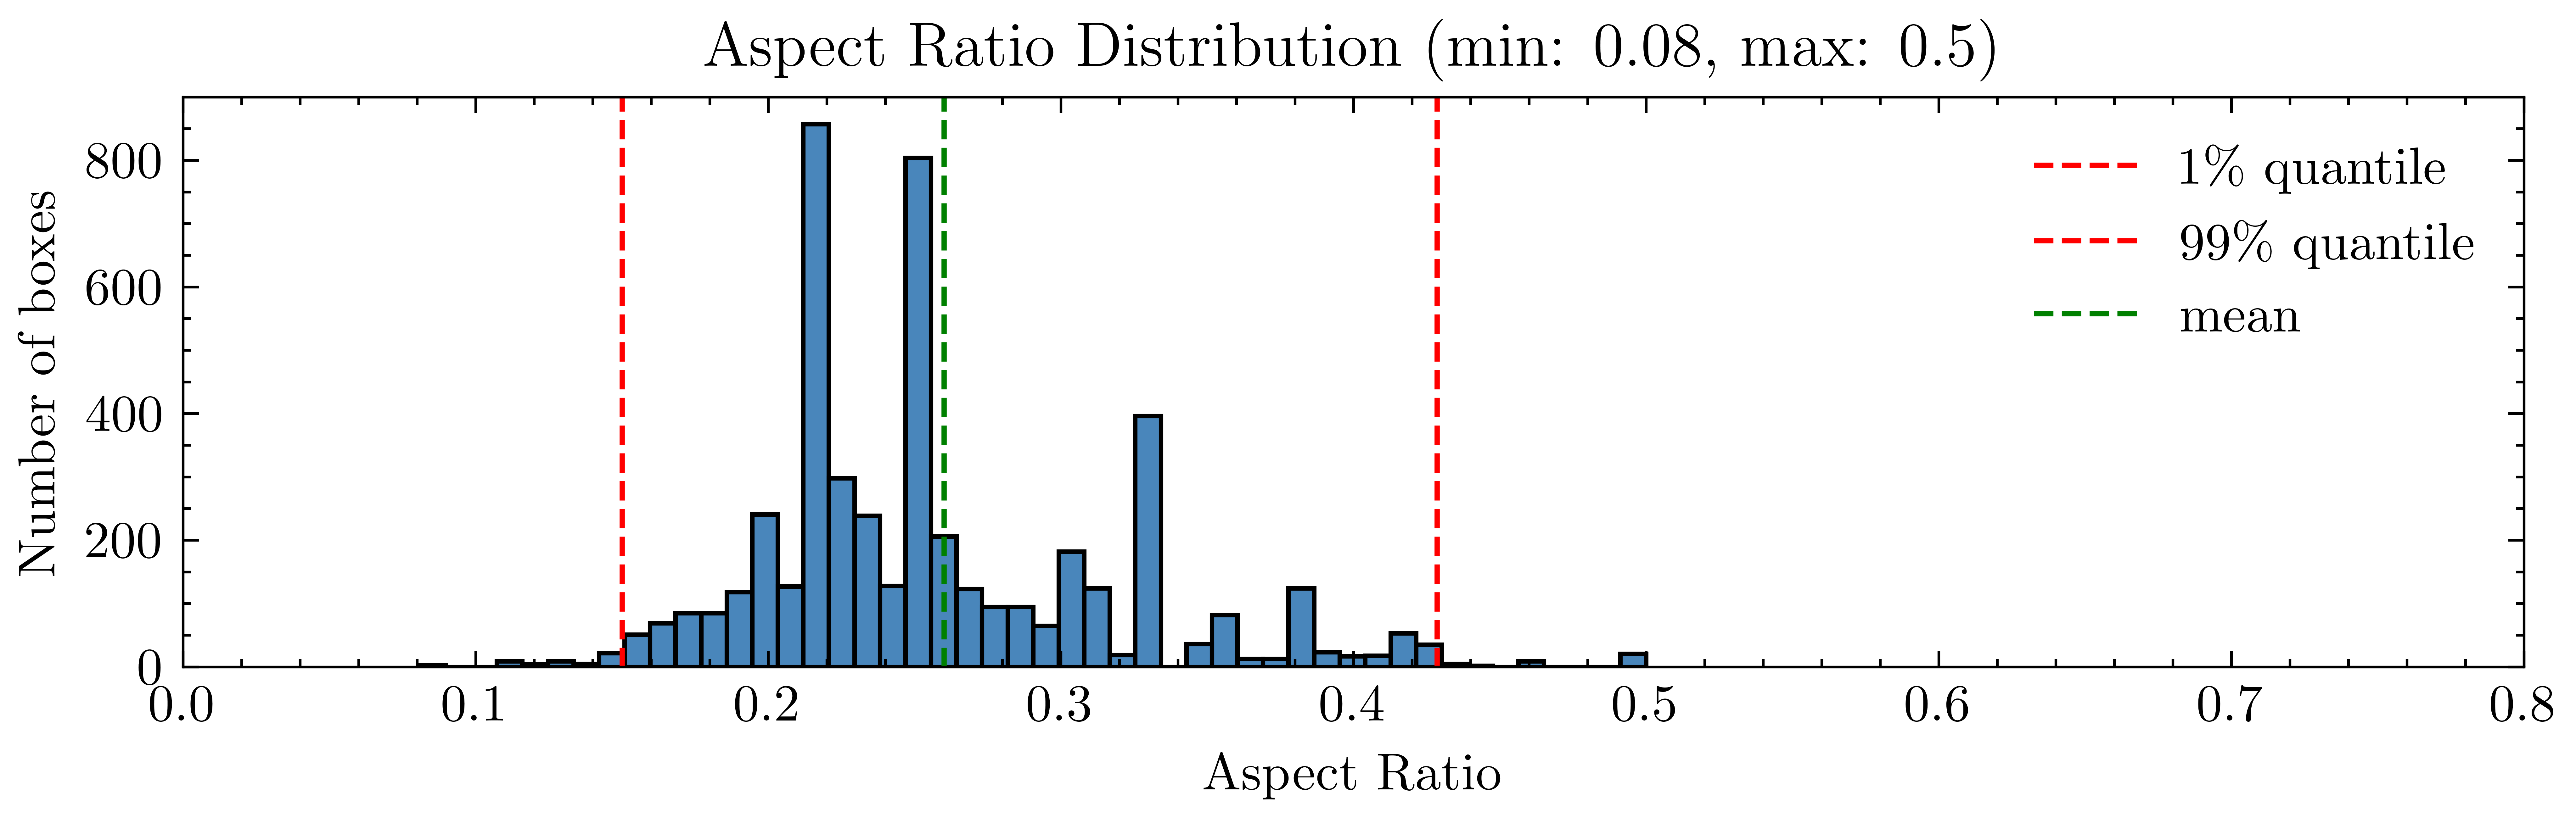

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,4910.000,4910.000,4910.000,4910.000,4910.000,4910.000,4910.000,4910.000,4910.000
mean,8151.193,673.098,201.413,440.723,71.245,447.550,98.120,6.630,25.806
std,5853.374,459.081,162.824,221.980,5.700,222.234,14.889,2.450,12.769
min,1473.350,154.000,50.506,130.857,63.260,137.111,81.540,3.814,12.184
25%,2286.500,243.000,62.971,228.308,66.102,232.767,86.100,4.330,13.910
50%,6994.000,566.000,130.633,469.760,71.305,474.995,92.770,6.020,21.540
75%,14805.000,1219.750,311.270,592.282,76.312,604.740,110.568,8.607,37.225
max,16645.650,1361.000,492.476,776.088,79.170,782.554,123.330,10.686,46.826


In [11]:
tmp_anno = annotations[annotations["category_id"] == "person"]
tmp_anno = analytics.remove_outliers(tmp_anno, qrange=(0.15, 0.85))
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 0.8))
tmp_anno.describe().round(3)

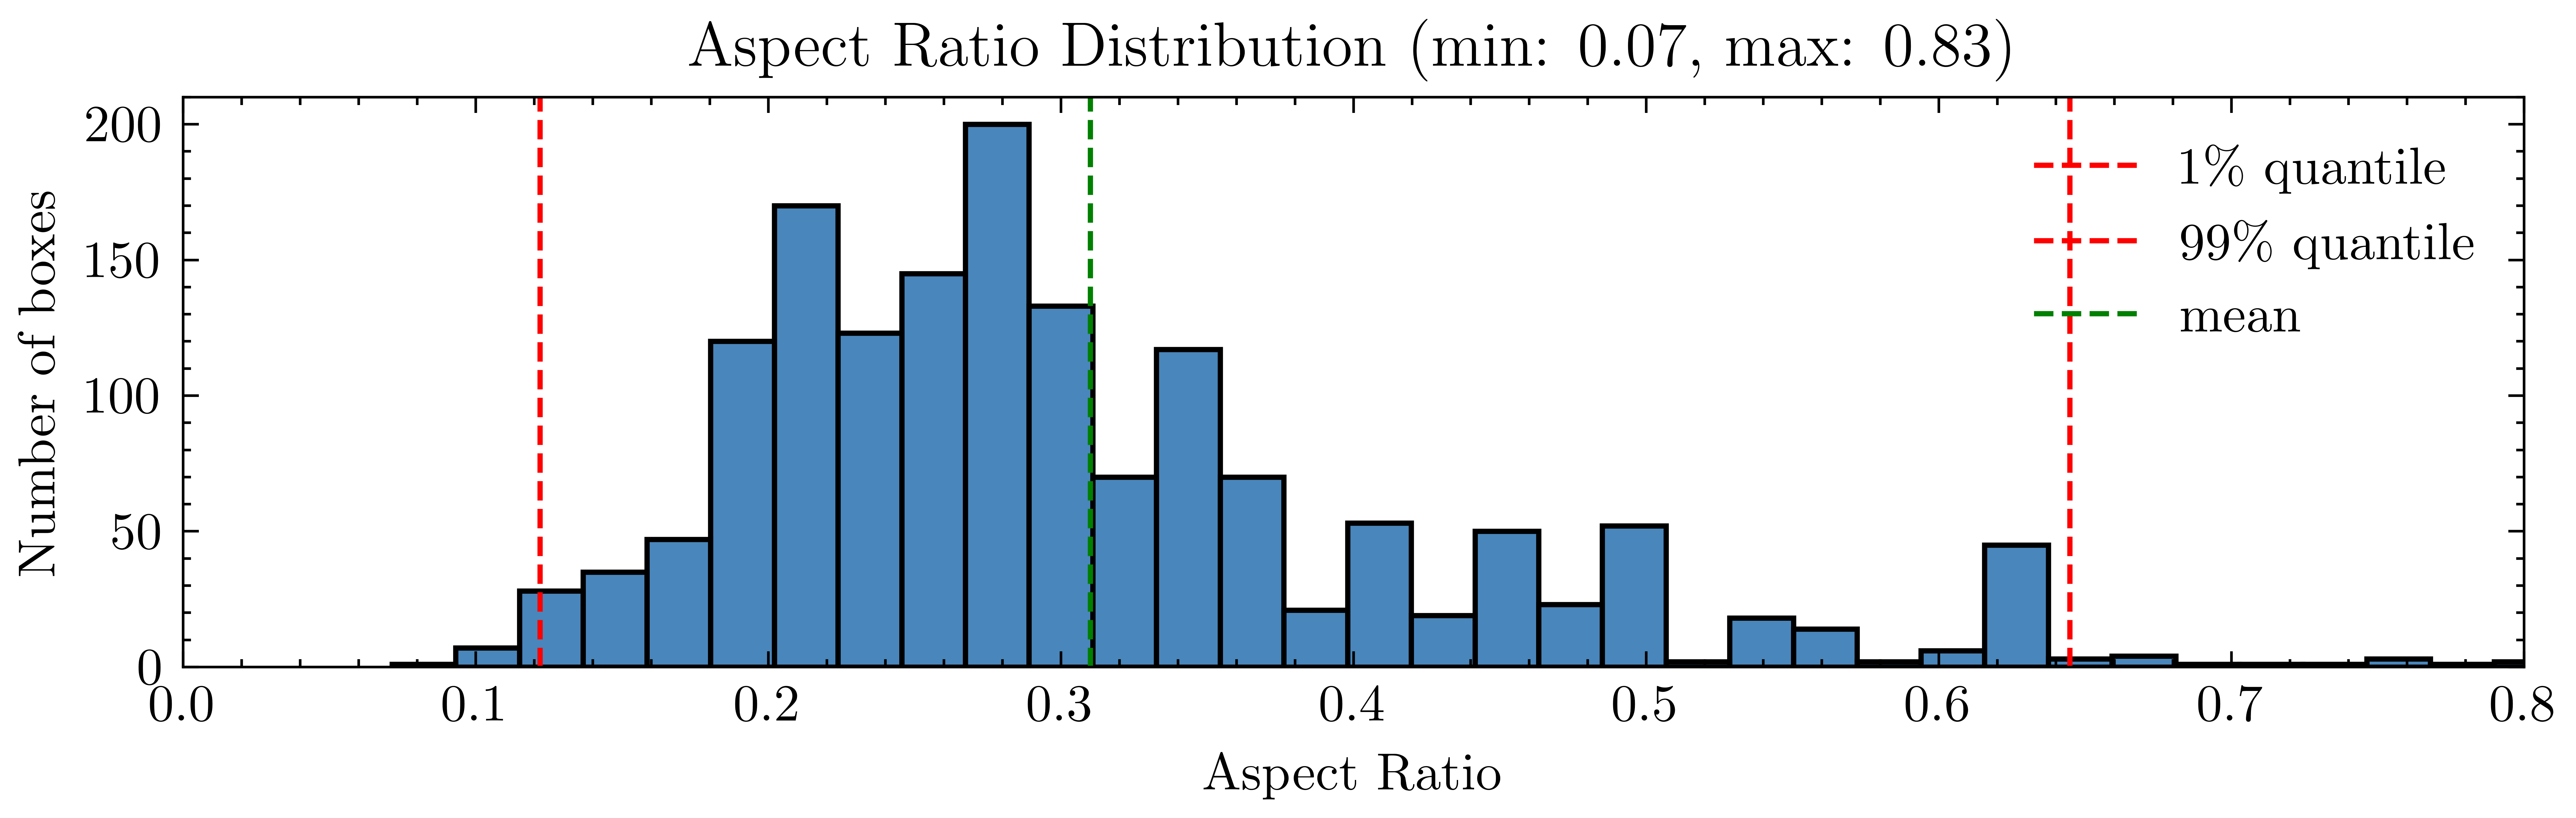

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,1588.000,1588.000,1588.000,1588.000,1588.000,1588.000,1588.000,1588.000,1588.000
mean,8395.444,697.800,299.634,440.315,68.517,448.839,97.213,8.449,28.680
std,5524.170,439.625,350.790,295.013,6.862,296.052,17.605,4.963,15.153
min,1065.000,117.000,20.359,0.000,42.530,9.194,65.076,2.410,8.660
25%,3832.750,351.000,91.672,190.978,63.735,203.835,83.330,5.510,15.997
50%,5797.000,475.000,171.331,423.780,69.330,433.110,93.425,6.700,24.655
75%,14816.250,1220.250,359.498,604.698,73.002,610.448,111.815,9.335,40.102
max,18104.140,1572.000,4190.340,1006.800,102.710,1024.000,128.000,46.200,78.073


In [12]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "rider"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 0.8))
tmp_anno.describe().round(3)


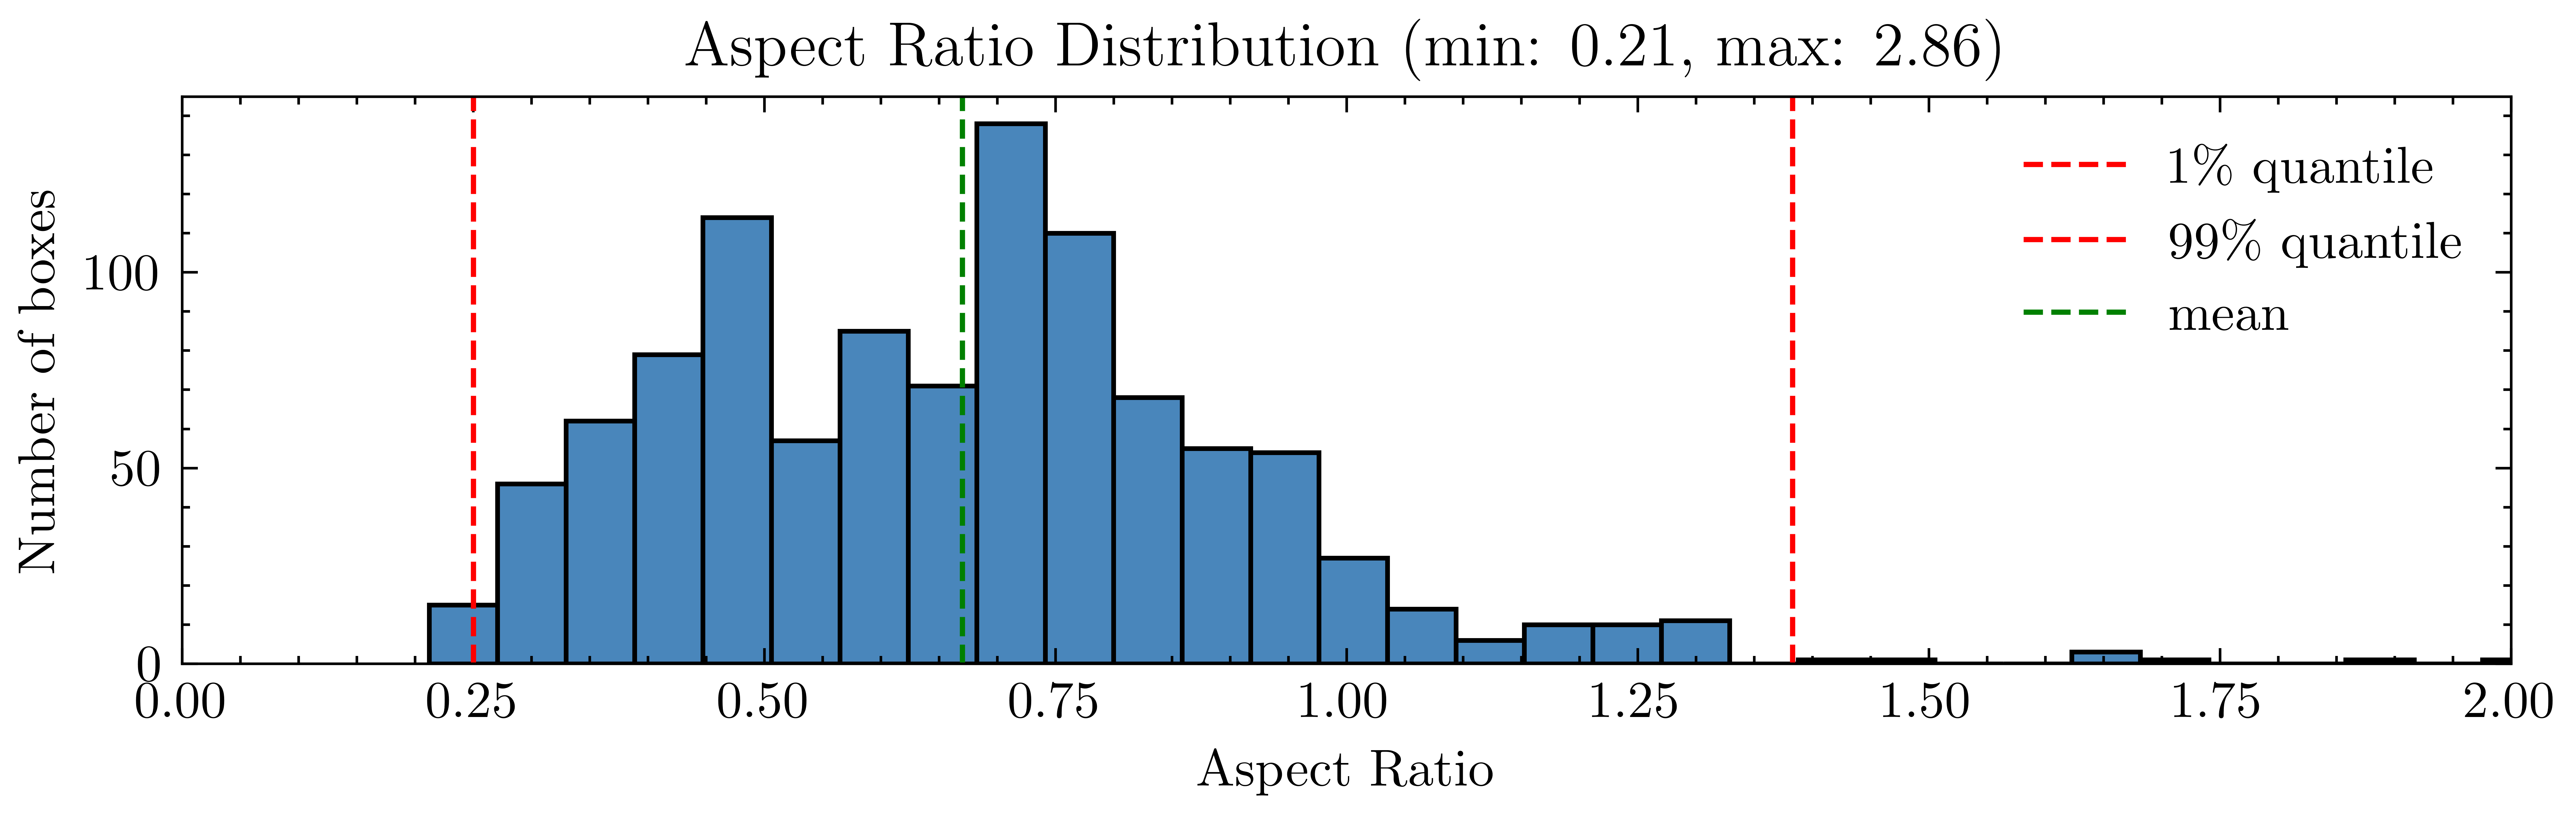

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,1043.000,1043.000,1043.000,1043.000,1043.000,1043.000,1043.000,1043.000,1043.000
mean,6161.597,496.277,297.721,570.302,80.288,583.999,101.224,13.697,20.636
std,3061.292,215.902,162.866,265.343,11.333,265.136,13.099,5.281,6.166
min,183.860,21.000,21.528,47.200,46.250,51.610,78.600,3.390,6.154
25%,2810.500,280.000,202.804,368.670,74.255,383.815,90.955,10.630,16.370
50%,7706.000,614.000,279.340,606.560,80.400,621.030,100.400,13.480,20.240
75%,8639.500,666.000,371.952,801.935,88.065,818.480,109.890,16.015,24.730
max,10579.000,804.000,933.556,937.800,102.710,949.040,128.000,31.630,37.100


In [13]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "bicycle"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))
tmp_anno.describe().round(3)


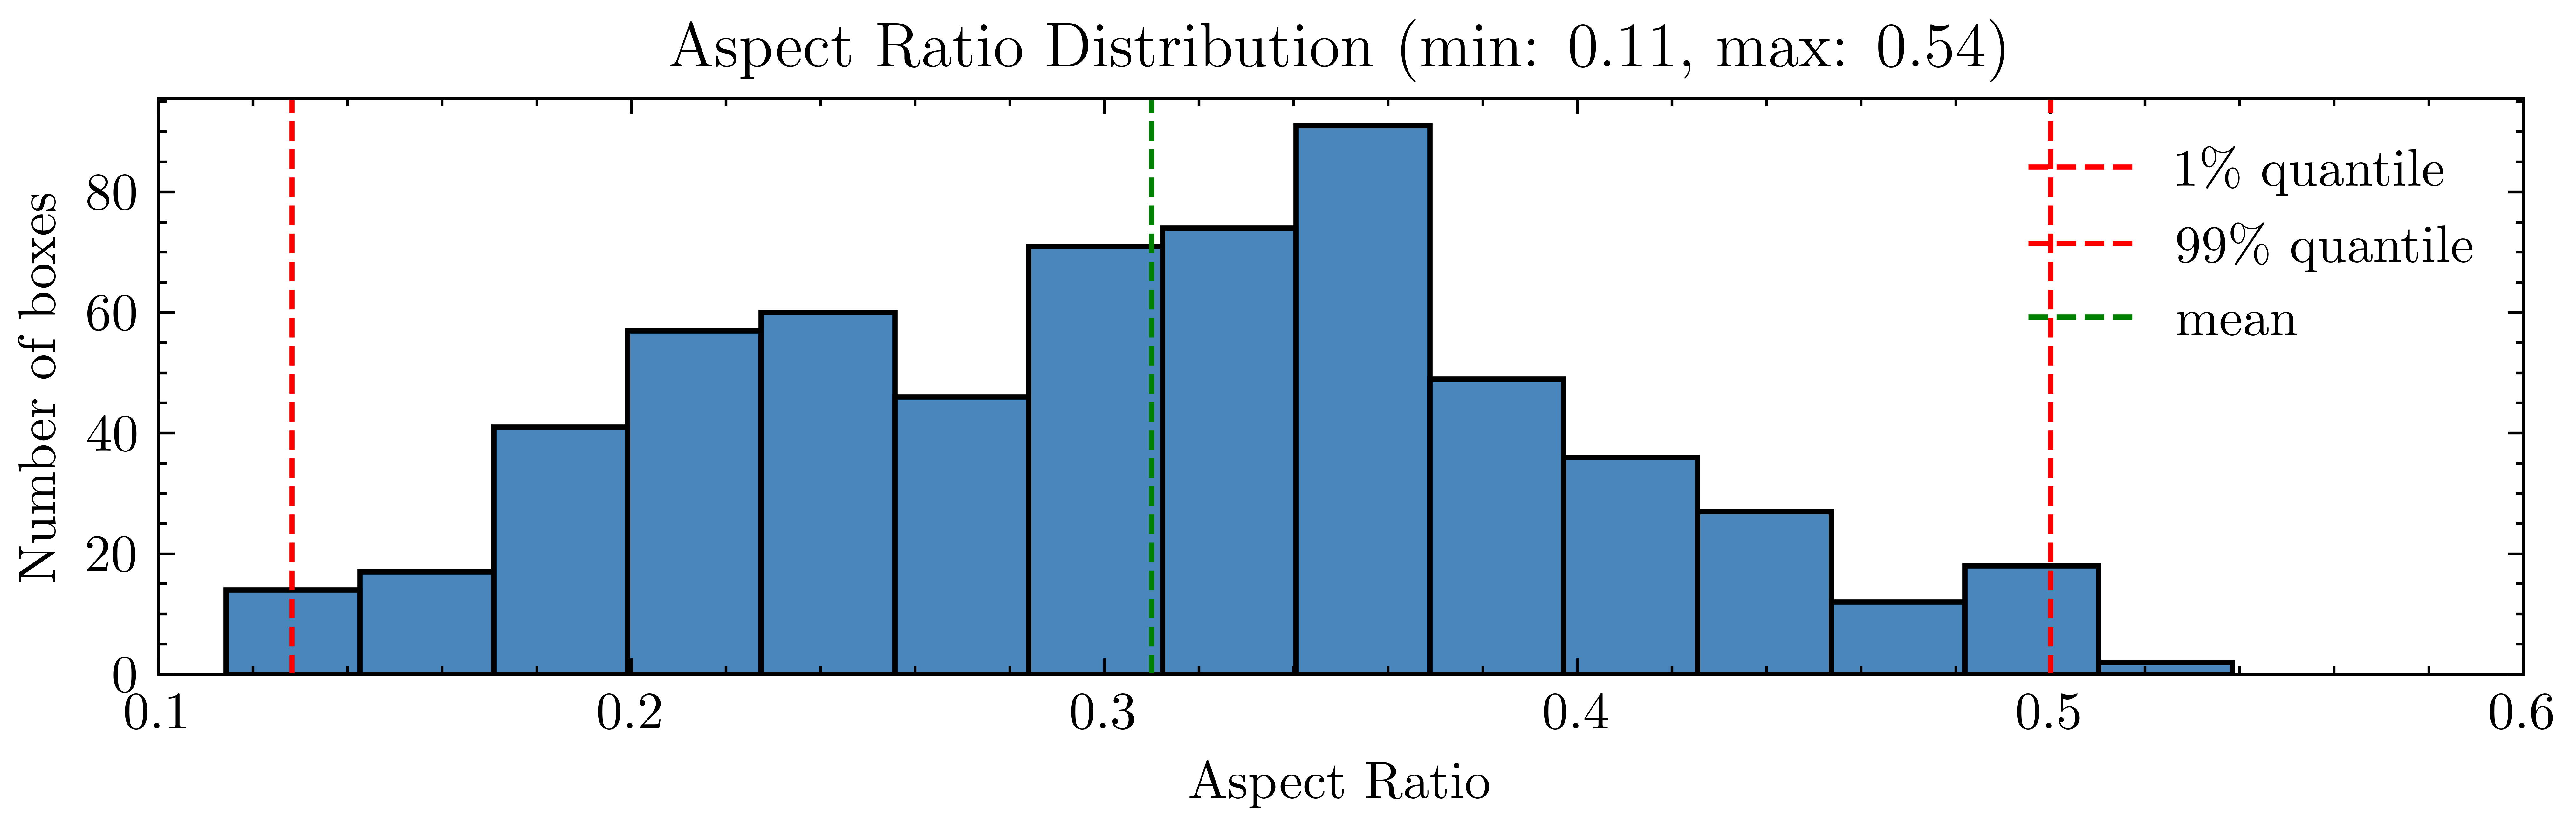

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,615.000,615.000,615.000,615.000,615.000,615.000,615.000,615.000,615.000
mean,4844.501,436.992,289.424,590.138,79.482,599.830,109.113,9.402,29.631
std,6892.184,583.913,140.906,290.499,12.786,290.985,16.498,3.100,6.574
min,183.860,21.000,54.559,76.100,53.320,82.900,75.300,3.630,13.840
25%,616.500,69.000,184.815,296.800,70.870,309.515,97.695,7.120,24.335
50%,1783.000,193.000,261.274,639.170,81.710,645.880,110.400,8.650,30.430
75%,2676.500,271.000,373.692,854.010,89.605,863.415,127.860,11.980,34.255
max,18104.140,1572.000,801.736,1006.800,99.330,1024.000,128.000,18.380,43.960


In [14]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "scooter"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0.1, 0.6))
tmp_anno.describe().round(3)


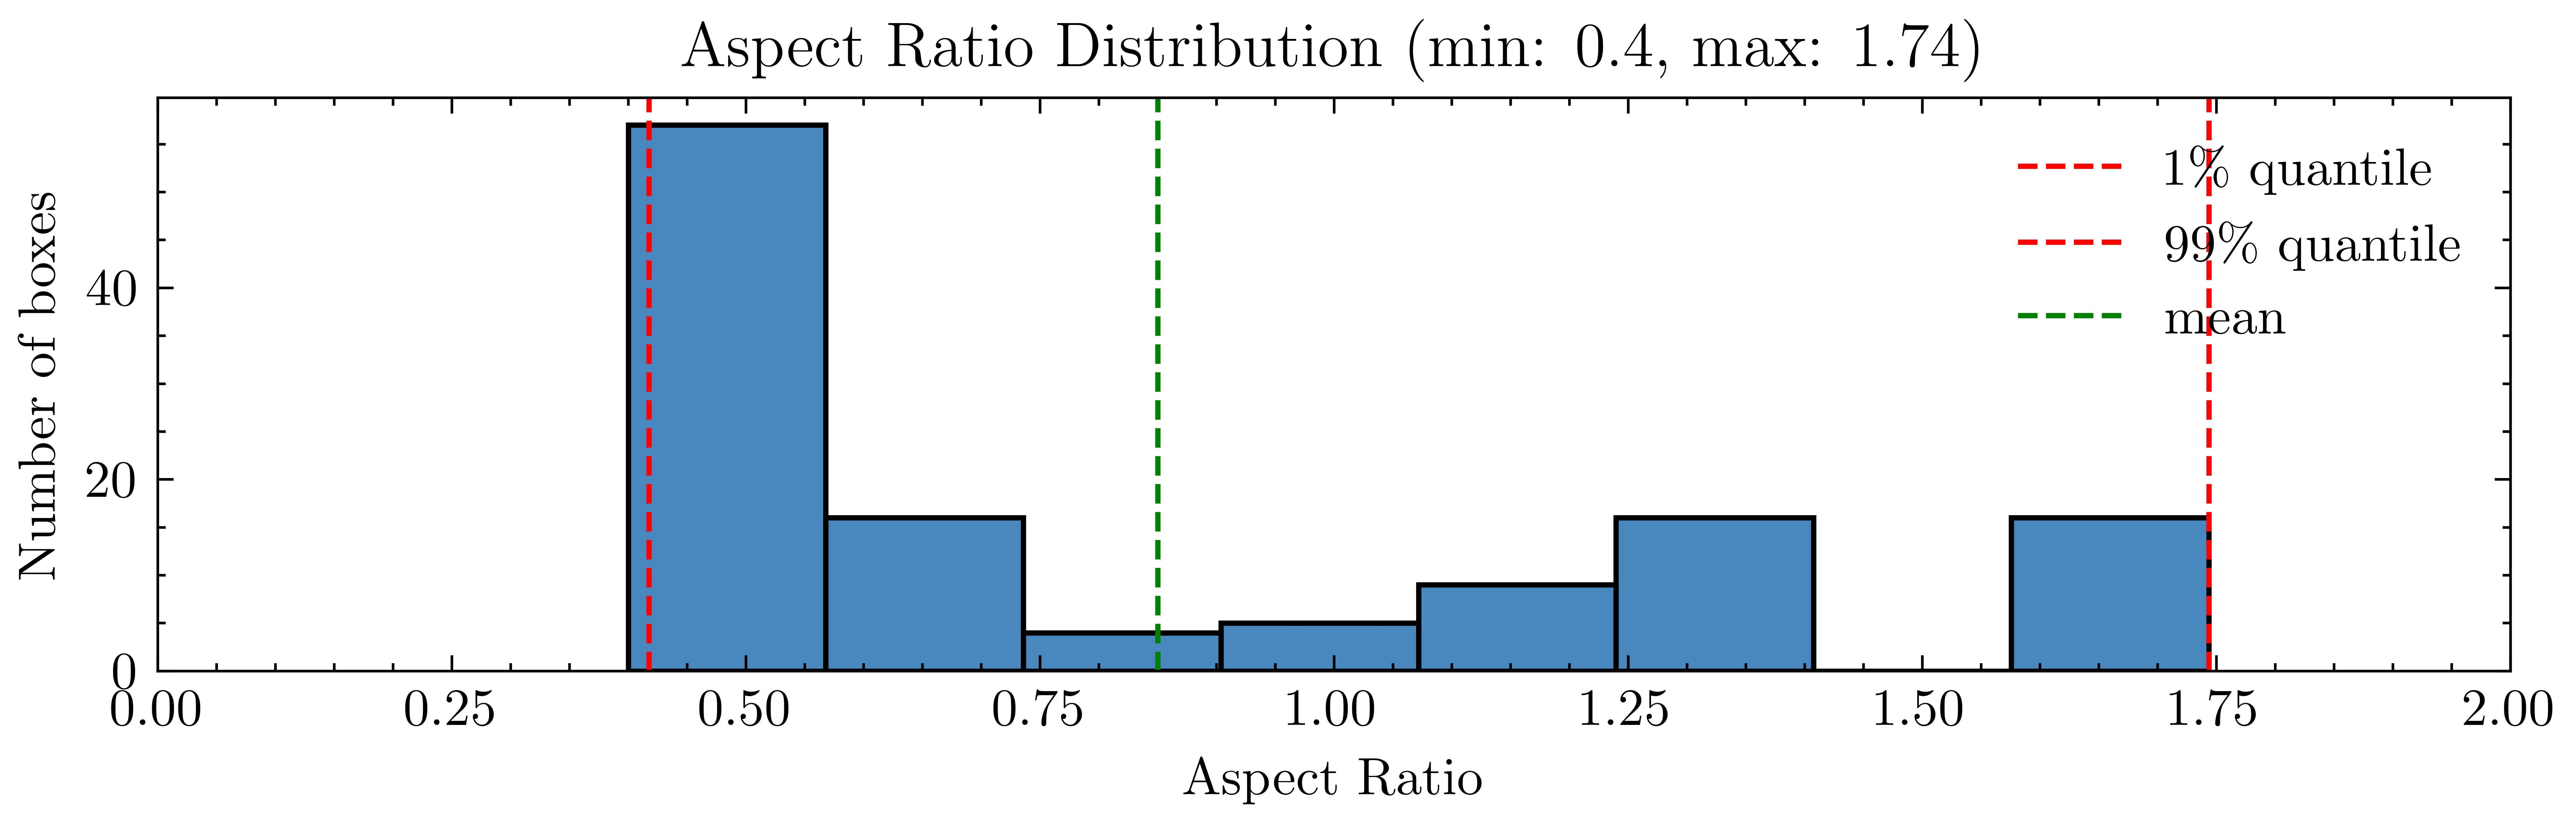

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000,123.000
mean,13943.309,1087.504,2311.863,209.688,48.336,265.836,92.134,41.527,44.374
std,571.126,73.933,2785.309,253.489,9.773,258.501,21.101,42.171,24.746
min,13186.000,1005.000,156.854,1.280,42.530,9.620,65.076,8.330,14.430
25%,13538.000,1035.500,301.687,6.830,42.530,21.475,77.235,14.645,20.600
50%,13812.000,1066.000,714.950,19.920,44.010,106.850,85.120,22.290,39.090
75%,14099.500,1096.500,3792.811,465.725,45.870,500.520,106.170,46.660,78.073
max,15208.000,1242.000,7334.665,618.680,70.760,637.040,128.000,136.518,78.073


In [15]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "truck"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))
tmp_anno.describe().round(3)


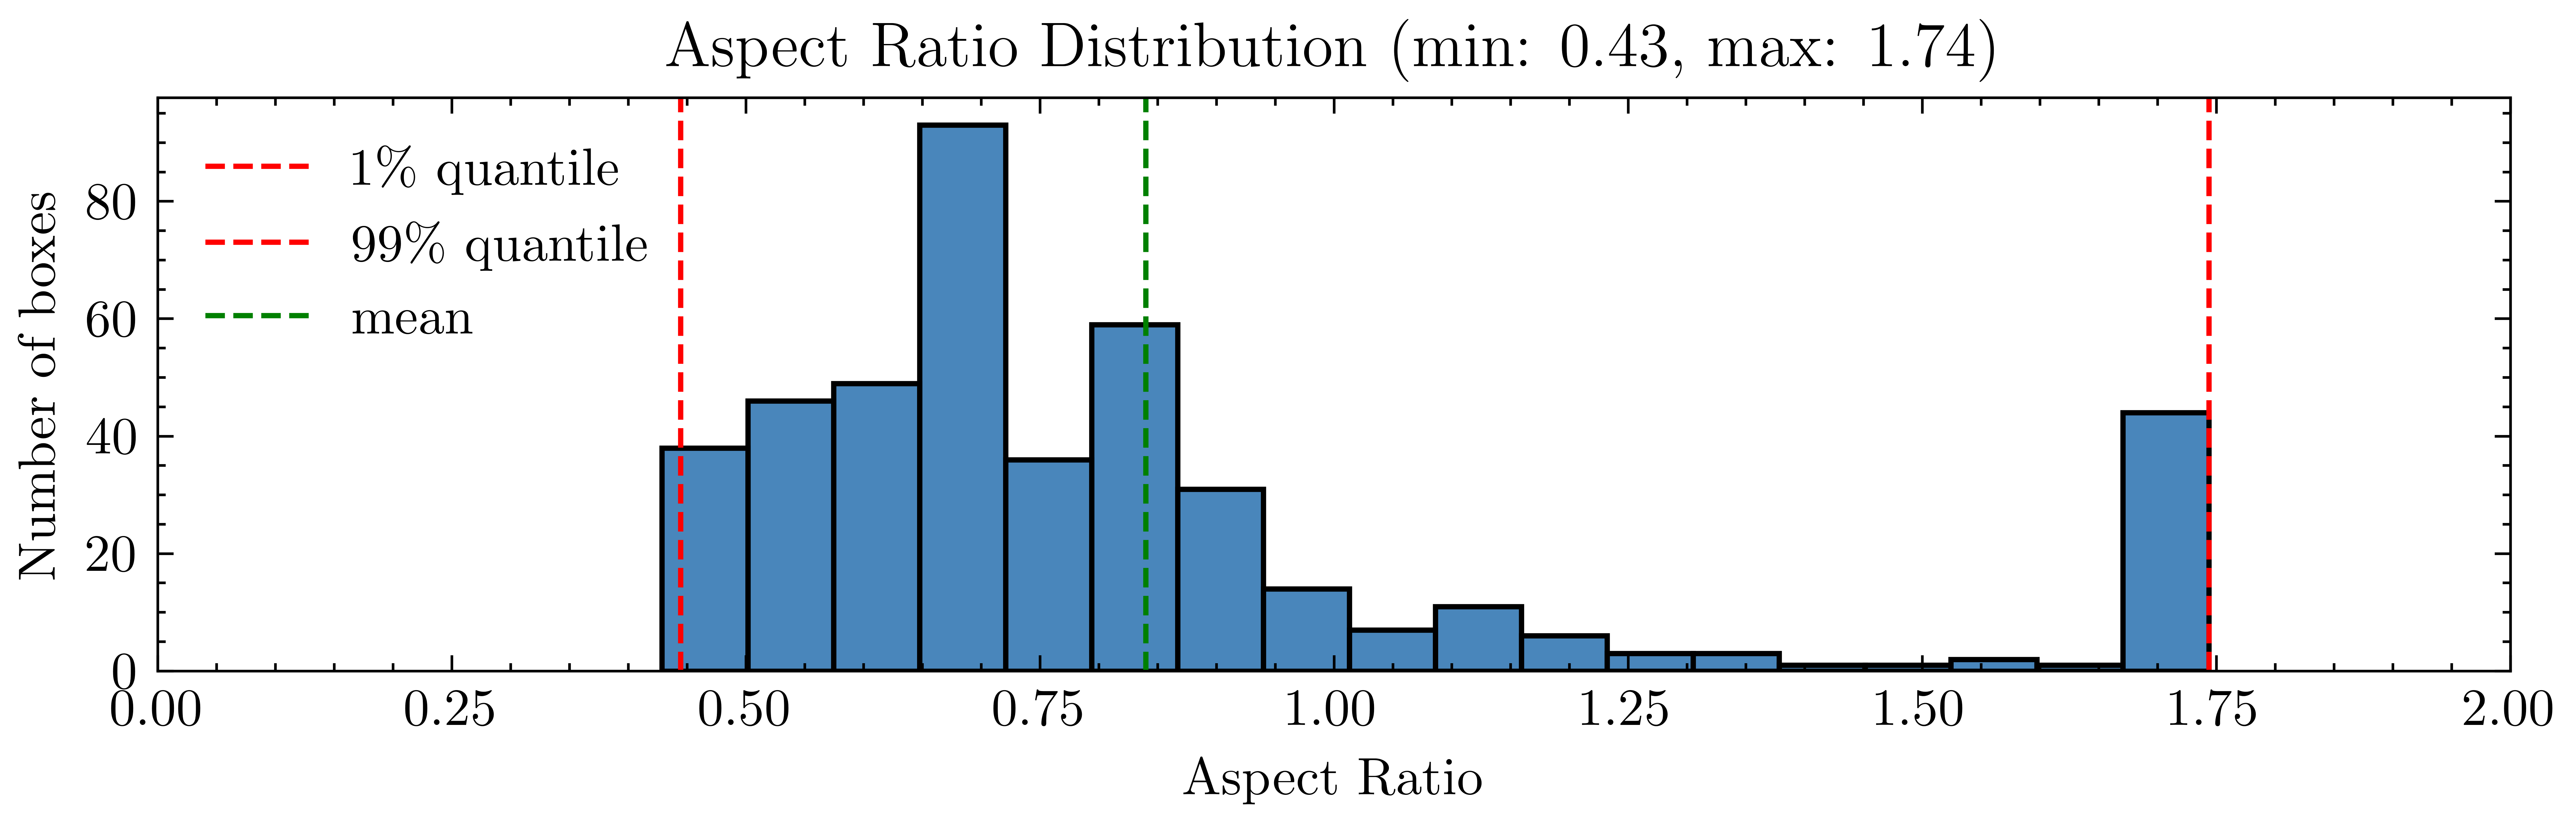

,id,image_id,area,xmin,ymin,xmax,ymax,width,height
count,445.00,445.000,445.000,445.000,445.000,445.000,445.000,445.000,445.000
mean,10684.16,828.510,1810.986,173.268,51.474,218.892,84.910,33.894,31.490
std,2829.54,208.807,2853.838,270.861,5.796,327.084,24.012,41.773,26.027
min,4710.00,404.000,21.735,2.500,42.530,9.194,65.076,4.040,6.154
25%,9457.00,719.000,120.980,10.840,49.590,19.720,66.390,8.890,13.480
50%,11868.00,934.000,265.325,21.050,52.330,37.110,74.150,14.130,18.990
75%,12914.00,990.000,1032.712,534.470,54.170,602.310,92.340,30.290,35.790
max,14186.00,1104.000,7334.665,1006.800,64.230,1024.000,128.000,136.518,78.073


In [16]:
tmp_anno = clean_annotations[clean_annotations["category_id"] == "bus"]
analytics.view_aspect_ratio_distribution(tmp_anno, xscale=(0, 2))
tmp_anno.describe().round(3)


## Finding aspect-ratios for each Category

In [4]:
N_CLUSTERS = 6
CATAGORIES = ["rider", "person", "bicycle", "scooter", "car", "truck", "bus"]

In [5]:
analytics.kmeans_aspect_ratios_by_categories(clean_annotations, CATAGORIES, N_CLUSTERS).round(2)

,0,1,2,3,4,5
rider,0.15,0.20,0.25,0.30,0.37,0.53
person,0.16,0.20,0.25,0.29,0.34,0.41
bicycle,0.30,0.41,0.55,0.73,0.92,1.33
scooter,0.15,0.20,0.26,0.32,0.37,0.46
car,0.41,0.69,0.96,1.39,2.58,4.93
truck,0.46,0.57,0.69,1.08,1.30,1.75
bus,0.54,0.63,0.71,0.87,1.14,1.73
